In [ ]:
#import data
import pandas as pd
df = pd.read_csv('Score_Results_combat.csv')
df_1 = pd.read_csv('Score_Results_harmony.csv')
df_2 = pd.read_csv('Score_Results.csv')
integrators = ['combat', 'harmony', 'scanorama', 'nbc']

df = pd.concat((df, df_1), ignore_index=True, axis=0)
df = pd.concat((df, df_2), ignore_index=True, axis=0)
df

,ari,hvg,asw,f1,nmi,sil,graph,pcr,sil_batch,avg_bio,avg_batch,time
0,0.430583,1.000000,0.645393,0.687441,0.738788,0.577696,0.861483,0.000000,0.880055,0.679983,0.580513,0.000000
1,0.430583,1.000000,0.611128,0.719437,0.738788,0.558601,0.971769,0.000000,0.906380,0.676423,0.626049,72.240449
2,0.558804,0.419500,0.611128,0.719437,0.714761,0.558601,0.971769,0.999910,0.906380,0.597039,0.959353,52.636773
3,0.430583,1.000000,0.645393,0.687441,0.738788,0.577696,0.861483,0.358984,0.880055,0.679983,0.700174,23.277055
4,0.511199,0.204625,0.683749,0.839378,0.720411,0.568377,0.858067,0.451161,0.855365,0.587956,0.721531,318.586980
5,0.173936,0.123625,0.561863,0.683230,0.478621,0.430785,0.481441,0.000000,0.453999,0.408677,0.311813,1092.621479


In [23]:
# Create a boolean mask for the rows you want
mask = df.index.isin([1, 3, 4, 5])

# Apply the mask
df = df[mask]

df.loc[5, "avg_bio"] = 0.7027
df.loc[5, "avg_batch"] = 0.7554

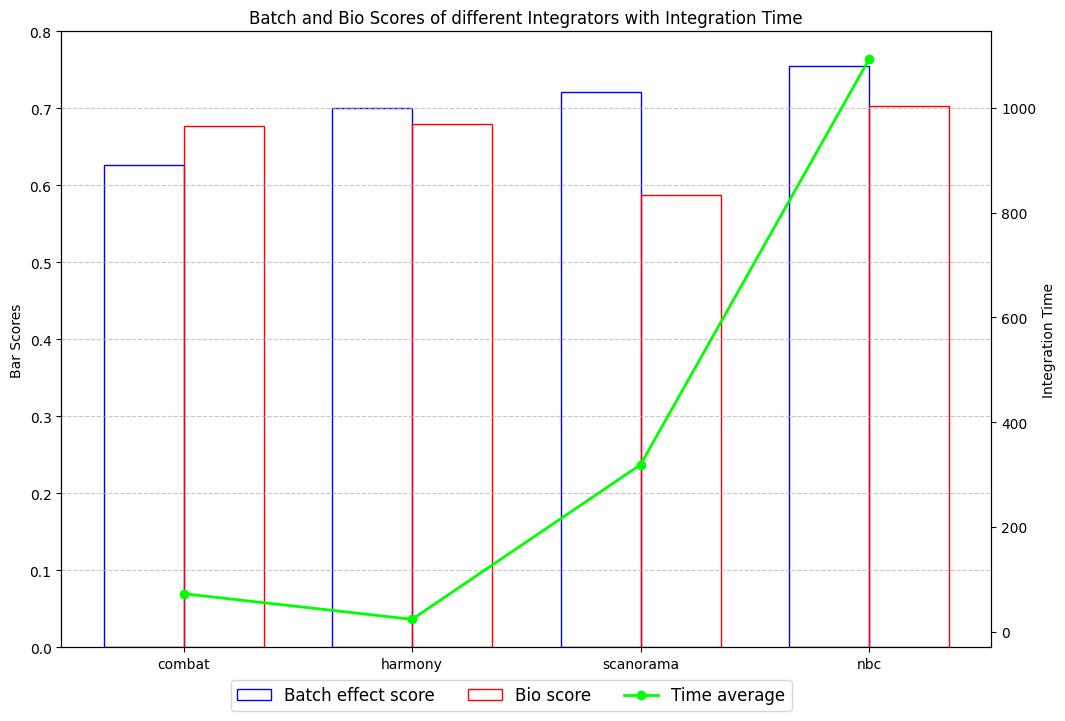

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# Set up color scheme to be consistent across both plots
colors = [(0, 0, 1, 1), (1, 0, 0, 1), (0, 1, 0, 1), (1, 0, 1, 1)]
width = 0.35  # the width of the bars

# PLOT
# -----------------------
x_integratos= np.arange(len(integrators))
fig, ax1 = plt.subplots(figsize=(12, 8))

# First bar chart (batch effect score)
rects1 = ax1.bar(x_integratos - width/2,
            height=df["avg_batch"],
            capsize=12,
            width=width,
            label='Batch effect score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[0]
            )

# Second bar chart (bio score)
rects1 = ax1.bar(x_integratos + width/2,
            height=df["avg_bio"],
            capsize=12,
            width=width,
            label='Bio score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[1]
            )

# Set up labels for primary y-axis
ax1.set_ylabel('Bar Scores')
ax1.set_ylim(0, 0.8)
ax1.set_title('Batch and Bio Scores of different Integrators with Integration Time')
ax1.set_xticks(x_integratos)
ax1.set_xticklabels(integrators)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for the line plot
ax2 = ax1.twinx()

# Line plot (time average)
line1 = ax2.plot(x_integratos, df["time"], color=colors[2], marker='o', 
               linestyle='-', linewidth=2, label='Time average')
ax2.set_ylabel('Integration Time')

#get lines and labels
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Create a single legend for the entire figure
# Pull all handles and labels
all_lines = lines1 + lines2  # We only need one set since both plots use the same labels
all_labels = labels1 + labels2

# Add the legend to the figure rather than to a specific axis
fig.legend(all_lines, all_labels, loc='upper center', bbox_to_anchor=(0.5, 0.08), 
          fontsize=12, frameon=True, ncol=3)
